Kaggle competition to predict sale price of houses

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_columns', None)
train_data=pd.read_csv('C:/Users/User/Desktop/Data Analytics projects dataset/train.csv')
test_data=pd.read_csv('C:/Users/User/Desktop/Data Analytics projects dataset/test.csv')

In [128]:
train_data.shape

(1460, 70)

In [129]:
test_data.shape

(1459, 65)

In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_data.shape

(1460, 81)

In [7]:
#checking for missing values
train_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
#filling missing values in the LotFrontage columns with the mean value of that column
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [9]:
train_data=pd.get_dummies(data=train_data,columns=['MiscFeature'])

In [10]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,0.001370,0.001370,0.033562,0.000685
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.036999,0.036999,0.180160,0.026171
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,0.000000,0.000000,0.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000,0.000000,0.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train_data['LotFrontage'].median()

70.04995836802665

In [12]:
train_data=pd.get_dummies(data=train_data,columns=['CentralAir'],drop_first=True)

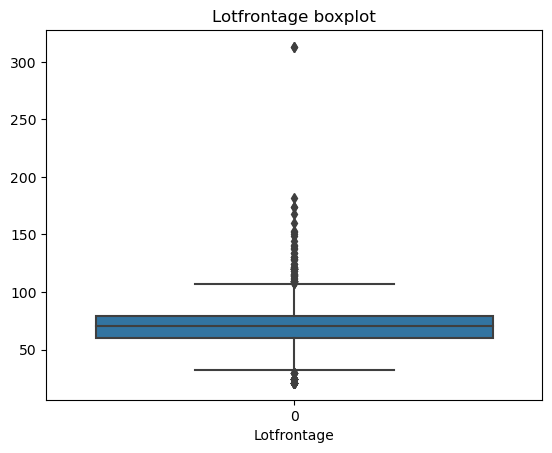

In [13]:
sns.boxplot(data=train_data['LotFrontage'])
plt.xlabel('Lotfrontage')
plt.title('Lotfrontage boxplot')
plt.show()

In [14]:
#retrieving categorical features
categorical=train_data.select_dtypes(include=['object']).columns
cat_total=len(categorical)
print(cat_total,' categorical columns')

41  categorical columns


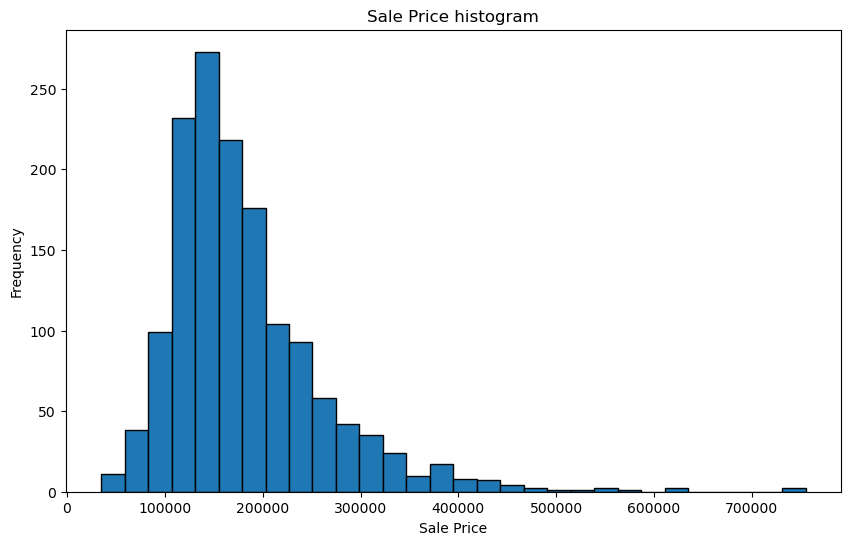

In [15]:
#first lets see the distribution of the SalePrice
plt.figure(figsize=(10,6))
plt.hist(train_data['SalePrice'],bins=30,edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price histogram')
plt.show()


From the histogram we can see the the sales price resembels a normal distribution though a right skewed one

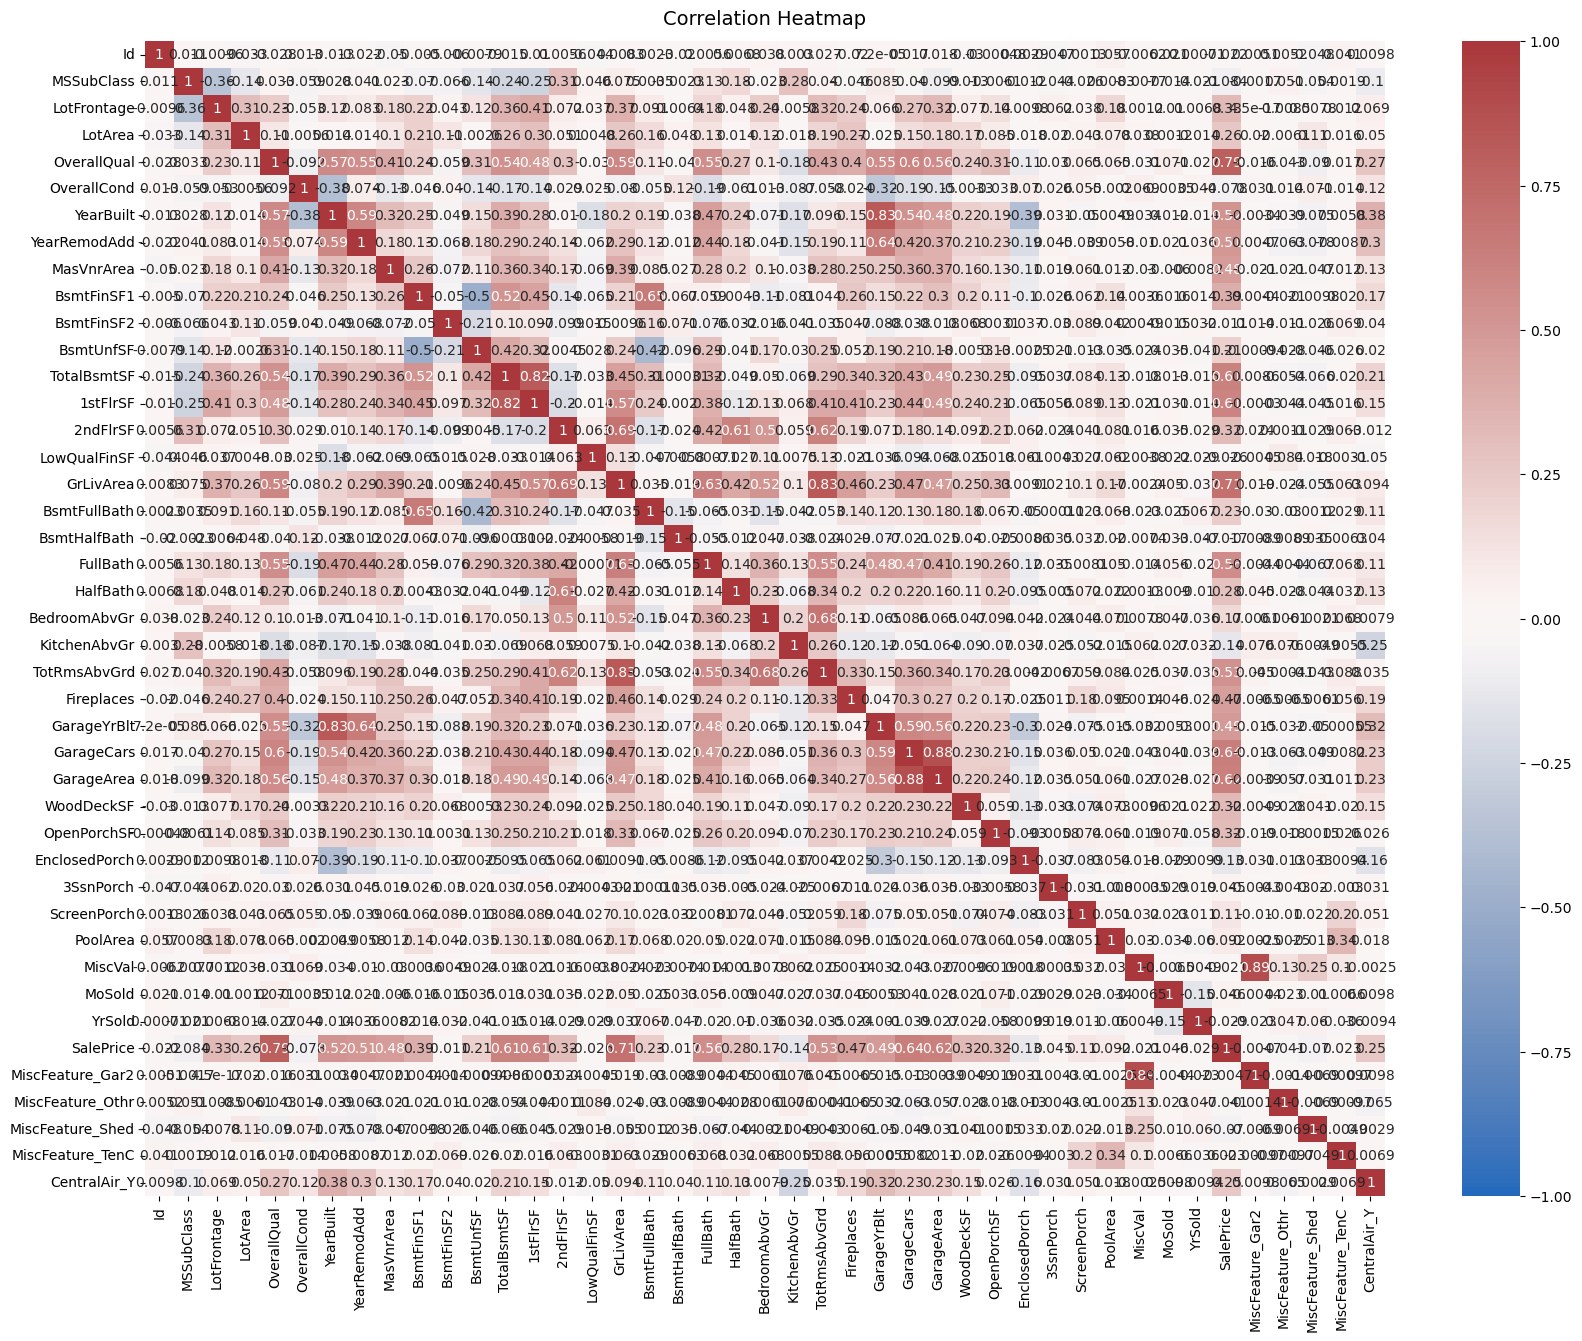

In [16]:
#lets see how the features are corelated
plt.figure(figsize=(20,15))
heatmap=sns.heatmap(train_data.corr(),vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

we have some dark squares overallquality vs saleprice this means overallquality is a very important feature in determining sale price of a home

In [17]:
#lets pull up top 10 most correlated features
corr=train_data.corr().stack().reset_index()
corr.columns=['Variable 1','Variable 2','correlation coefficient']
corr[['Variable 1', 'Variable 2']] = np.sort(corr[['Variable 1', 'Variable 2']], axis=1)
#drop duplicates and self correlation
sorted_corr=corr[corr['Variable 1'] != corr['Variable 2']].drop_duplicates().sort_values(by='correlation coefficient',ascending=False)
print('Top 10 correlated features')
print(sorted_corr.head(10))

Top 10 correlated features
            Variable 1    Variable 2  correlation coefficient
1500  MiscFeature_Gar2       MiscVal                 0.885427
1145        GarageArea    GarageCars                 0.882475
283        GarageYrBlt     YearBuilt                 0.825667
711          GrLivArea  TotRmsAbvGrd                 0.825489
529           1stFlrSF   TotalBsmtSF                 0.819530
209        OverallQual     SalePrice                 0.790982
725          GrLivArea     SalePrice                 0.708624
618           2ndFlrSF     GrLivArea                 0.687501
926       BedroomAbvGr  TotRmsAbvGrd                 0.676620
404         BsmtFinSF1  BsmtFullBath                 0.649212


In [18]:
#lets pull top 10 features correlated to SalePrice
correlation=train_data.corr()
top=correlation['SalePrice'].sort_values(ascending=False)
top.head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [19]:
train_data['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [20]:
#drop columns that are highly correlated
selected_columns=['MiscVal','2ndFlrSF','GarageCars','1stFlrSF','MiscVal']
train_data=train_data.drop(columns=selected_columns)


In [21]:
test_data.drop(selected_columns,axis=1, inplace=True)

In [22]:
test_data.shape

(1459, 76)

In [23]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,CentralAir_Y
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,2,2008,WD,Normal,208500,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,SBrkr,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,5,2007,WD,Normal,181500,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,SBrkr,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,9,2008,WD,Normal,223500,0,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,SBrkr,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,2,2006,WD,Abnorml,140000,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,SBrkr,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,12,2008,WD,Normal,250000,0,0,0,0,1


In [24]:
train_data.isnull().sum().sort_values(ascending=False)

PoolQC          1453
Alley           1369
Fence           1179
FireplaceQu      690
GarageFinish      81
                ... 
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
CentralAir_Y       0
Length: 80, dtype: int64

In [25]:
train_data.drop(['BsmtFinType2','BsmtCond','BsmtFinType1','BsmtQual','MasVnrType'],axis=1,inplace=True)

In [26]:
test_data.drop(['BsmtFinType2','BsmtFinType1','MasVnrType'],axis=1,inplace=True)

In [27]:
test_data.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
HeatingQC           0
CentralAir          0
Electrical          0
LowQualFinSF        0
SaleCondition       0
Length: 73, dtype: int64

In [28]:
test_data['MSZoning'].fillna('None',inplace=True)
test_data['BsmtFullBath'].fillna('None',inplace=True)
test_data['Functional'].fillna('None',inplace=True)
test_data['KitchenQual'].fillna('None',inplace=True)
test_data['Utilities'].fillna('None',inplace=True)
test_data['TotalBsmtSF'].fillna('None',inplace=True)
test_data['SaleType'].fillna('None',inplace=True)
test_data['Exterior1st'].fillna('None',inplace=True)

In [29]:
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(),inplace=True)

In [30]:
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(),inplace=True)

In [31]:
train_data.drop(['GarageCond','GarageType','GarageFinish'],axis=1,inplace=True)

In [32]:
test_data.drop(['GarageFinish','GarageCond','GarageType','BsmtCond','BsmtQual'],axis=1,inplace=True)

In [33]:
train_data['BsmtExposure'].fillna('None',inplace=True)

In [34]:
test_data['BsmtExposure'].fillna('None',inplace=True)

In [35]:
test_data['GarageQual'].fillna('None',inplace=True)

In [36]:
train_data['GarageQual'].fillna('None',inplace=True)

In [37]:
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(),inplace=True)

In [38]:
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(),inplace=True)

from the look we can see that poolQc is missing alot of values so we choose to drop this column

In [39]:
train_data.drop(['PoolQC'],axis=1,inplace=True)

In [40]:
test_data.drop(['PoolQC'],axis=1,inplace=True)

In [41]:
train_data.shape

(1460, 71)

In [42]:
test_data.shape

(1459, 67)

In [43]:
train_data['Fence'].fillna('None',inplace=True)

In [44]:
test_data['Fence'].fillna('None', inplace=True)

In [45]:
#lets drop the misfeature column
test_data.drop(['MiscFeature'],axis=1,inplace=True)

In [46]:
train_data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [47]:
train_data['FireplaceQu'].fillna('None',inplace=True)

In [48]:
test_data['FireplaceQu'].fillna('None',inplace=True)

In [49]:
train_data.drop(['Alley'],axis=1,inplace=True)
test_data.drop(['Alley'],axis=1,inplace=True)

In [50]:
#lets sort LotFrontage
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(),inplace=True)

In [51]:
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(),inplace=True)


In [52]:
#detecting outliers for GrLivArea
percentile75=train_data['GrLivArea'].quantile(0.75)
percentile25=train_data['GrLivArea'].quantile(0.25)
IQR=percentile75 - percentile25
upper_limit=percentile75 + 1.5*IQR
lower_limit=percentile25 - 1.5*IQR
outliers=train_data[(train_data['GrLivArea'] > upper_limit) | (train_data['GrLivArea'] <lower_limit)]
print('upper limit ',upper_limit)
print('lower limit ',lower_limit)
print('Outliers',len(outliers))


upper limit  2747.625
lower limit  158.625
Outliers 31


In [53]:
#imputes the GrLivArea column with upper limit and lower limit to remove outliers
train_data.loc[train_data['GrLivArea'] > upper_limit, 'GrLivArea'] = upper_limit
train_data.loc[train_data['GrLivArea']< lower_limit, 'GrLivArea'] = lower_limit

In [54]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,CentralAir_Y
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,5.844521,1503.735873,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890,0.001370,0.001370,0.033562,0.000685,0.934932
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,48.623081,481.375641,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883,0.036999,0.036999,0.180160,0.026171,0.246731
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,572.000000,2747.625000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


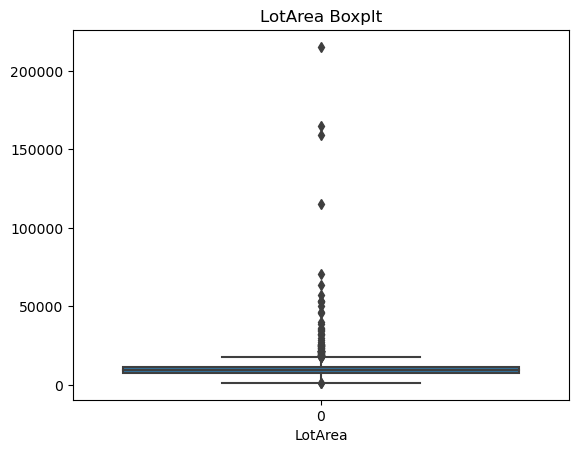

In [55]:
#check outliers for LotArea
sns.boxplot(data=train_data['LotArea'])
plt.xlabel('LotArea')
plt.title('LotArea Boxplt')
plt.show()

In [56]:
#function to detect outliers and impute the values with the upper limit from the quatile range
def outlier_imputer(column):
    for col in column:
        percentile75=train_data[col].quantile(0.75)
        percentile25=train_data[col].quantile(0.25)
        iqr=percentile75 - percentile25
        upper_limit=percentile75 + 1.5*iqr
        lower_limit=percentile25 - 1.5*iqr
        outliers=train_data[(train_data[col] > upper_limit) | (train_data[col] <lower_limit)]
        print('upper limit ',upper_limit)
        print('lower limit ',lower_limit)
        print('Outliers',len(outliers))
        train_data.loc[train_data[col]> upper_limit, col]=upper_limit
        train_data.loc[train_data[col]<lower_limit, col]=lower_limit
        print(train_data[col].describe())
        

In [57]:
outlier_imputer(['LotArea'])

upper limit  17673.5
lower limit  1481.5
Outliers 69
count     1460.000000
mean      9647.388014
std       3594.356399
min       1481.500000
25%       7553.500000
50%       9478.500000
75%      11601.500000
max      17673.500000
Name: LotArea, dtype: float64


In [58]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,CentralAir_Y
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,9647.388014,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,5.844521,1503.735873,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890,0.001370,0.001370,0.033562,0.000685,0.934932
std,421.610009,42.300571,22.024023,3594.356399,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,48.623081,481.375641,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883,0.036999,0.036999,0.180160,0.026171,0.246731
min,1.000000,20.000000,21.000000,1481.500000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1460.000000,190.000000,313.000000,17673.500000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,572.000000,2747.625000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#outleirs for Overallquall
outlier_imputer(['OverallQual'])


upper limit  10.0
lower limit  2.0
Outliers 2
count    1460.000000
mean        6.100685
std         1.378430
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


In [60]:
#outliers for MasVnrArea
outlier_imputer(['MasVnrArea'])

upper limit  410.625
lower limit  -246.375
Outliers 98
count    1460.000000
mean       89.974474
std       133.856899
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max       410.625000
Name: MasVnrArea, dtype: float64


In [61]:
#outliers for MasVnrAre

In [62]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,CentralAir_Y
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,9647.388014,6.100685,5.575342,1971.267808,1984.865753,89.974474,443.639726,46.549315,567.240411,1057.429452,5.844521,1503.735873,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890,0.001370,0.001370,0.033562,0.000685,0.934932
std,421.610009,42.300571,22.024023,3594.356399,1.378430,1.112799,30.202904,20.645407,133.856899,456.098091,161.319273,441.866955,438.705324,48.623081,481.375641,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883,0.036999,0.036999,0.180160,0.026171,0.246731
min,1.000000,20.000000,21.000000,1481.500000,2.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1460.000000,190.000000,313.000000,17673.500000,10.000000,9.000000,2010.000000,2010.000000,410.625000,5644.000000,1474.000000,2336.000000,6110.000000,572.000000,2747.625000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

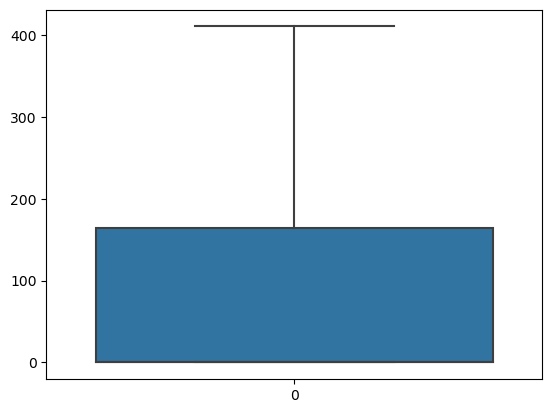

In [63]:
sns.boxplot(data=train_data['MasVnrArea'])

In [64]:
#impute outliers for MasVnrArea
outlier_imputer(['MasVnrArea'])

upper limit  410.625
lower limit  -246.375
Outliers 0
count    1460.000000
mean       89.974474
std       133.856899
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max       410.625000
Name: MasVnrArea, dtype: float64


In [65]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'MiscFeature_Ga

In [66]:
#print the shape of the train data and the test data
print(test_data.shape)
print(train_data.shape)

(1459, 65)
(1460, 70)


In [67]:
test=pd.get_dummies(data=test_data)
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,TotalBsmtSF_0.0,TotalBsmtSF_160.0,TotalBsmtSF_173.0,TotalBsmtSF_192.0,TotalBsmtSF_216.0,TotalBsmtSF_240.0,TotalBsmtSF_245.0,TotalBsmtSF_264.0,TotalBsmtSF_279.0,TotalBsmtSF_297.0,TotalBsmtSF_301.0,TotalBsmtSF_346.0,TotalBsmtSF_348.0,TotalBsmtSF_352.0,TotalBsmtSF_356.0,TotalBsmtSF_370.0,TotalBsmtSF_381.0,TotalBsmtSF_384.0,TotalBsmtSF_385.0,TotalBsmtSF_392.0,TotalBsmtSF_396.0,TotalBsmtSF_405.0,TotalBsmtSF_407.0,TotalBsmtSF_409.0,TotalBsmtSF_416.0,TotalBsmtSF_423.0,TotalBsmtSF_430.0,TotalBsmtSF_432.0,TotalBsmtSF_448.0,TotalBsmtSF_450.0,TotalBsmtSF_451.0,TotalBsmtSF_456.0,TotalBsmtSF_462.0,TotalBsmtSF_468.0,TotalBsmtSF_480.0,TotalBsmtSF_481.0,TotalBsmtSF_483.0,TotalBsmtSF_484.0,TotalBsmtSF_492.0,TotalBsmtSF_494.0,TotalBsmtSF_498.0,TotalBsmtSF_502.0,TotalBsmtSF_504.0,TotalBsmtSF_516.0,TotalBsmtSF_520.0,TotalBsmtSF_525.0,TotalBsmtSF_526.0,TotalBsmtSF_528.0,TotalBsmtSF_530.0,TotalBsmtSF_531.0,TotalBsmtSF_533.0,TotalBsmtSF_536.0,TotalBsmtSF_546.0,TotalBsmtSF_547.0,TotalBsmtSF_550.0,TotalBsmtSF_552.0,TotalBsmtSF_554.0,TotalBsmtSF_560.0,TotalBsmtSF_561.0,TotalBsmtSF_565.0,TotalBsmtSF_569.0,TotalBsmtSF_570.0,TotalBsmtSF_572.0,TotalBsmtSF_576.0,TotalBsmtSF_583.0,TotalBsmtSF_585.0,TotalBsmtSF_592.0,TotalBsmtSF_596.0,TotalBsmtSF_600.0,TotalBsmtSF_608.0,TotalBsmtSF_610.0,TotalBsmtSF_616.0,TotalBsmtSF_621.

In [68]:
train=pd.get_dummies(data=train_data)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,CentralAir_Y,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450.0,7,5,2003,2003,196.0,706,0,150,856,0,1710.0,1,0,2,1,3,1,8,0,2003.0,548,0,61,0,0,0,0,2,2008,208500,0

The tough part of cleaning the data is over now things are about to get intresting

In [69]:
test.isna().sum().sort_values(ascending=False)

BsmtHalfBath             2
BsmtFinSF1               1
BsmtFinSF2               1
GarageArea               1
BsmtUnfSF                1
                        ..
TotalBsmtSF_826.0        0
TotalBsmtSF_827.0        0
TotalBsmtSF_828.0        0
TotalBsmtSF_830.0        0
SaleCondition_Partial    0
Length: 972, dtype: int64

In [70]:
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(),inplace=True)

In [71]:
test['GarageArea'].fillna(test['GarageArea'].mean(),inplace=True)

In [72]:
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(),inplace=True)

In [73]:
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(),inplace=True)

In [74]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,TotalBsmtSF_0.0,TotalBsmtSF_160.0,TotalBsmtSF_173.0,TotalBsmtSF_192.0,TotalBsmtSF_216.0,TotalBsmtSF_240.0,TotalBsmtSF_245.0,TotalBsmtSF_264.0,TotalBsmtSF_279.0,TotalBsmtSF_297.0,TotalBsmtSF_301.0,TotalBsmtSF_346.0,TotalBsmtSF_348.0,TotalBsmtSF_352.0,TotalBsmtSF_356.0,TotalBsmtSF_370.0,TotalBsmtSF_381.0,TotalBsmtSF_384.0,TotalBsmtSF_385.0,TotalBsmtSF_392.0,TotalBsmtSF_396.0,TotalBsmtSF_405.0,TotalBsmtSF_407.0,TotalBsmtSF_409.0,TotalBsmtSF_416.0,TotalBsmtSF_423.0,TotalBsmtSF_430.0,TotalBsmtSF_432.0,TotalBsmtSF_448.0,TotalBsmtSF_450.0,TotalBsmtSF_451.0,TotalBsmtSF_456.0,TotalBsmtSF_462.0,TotalBsmtSF_468.0,TotalBsmtSF_480.0,TotalBsmtSF_481.0,TotalBsmtSF_483.0,TotalBsmtSF_484.0,TotalBsmtSF_492.0,TotalBsmtSF_494.0,TotalBsmtSF_498.0,TotalBsmtSF_502.0,TotalBsmtSF_504.0,TotalBsmtSF_516.0,TotalBsmtSF_520.0,TotalBsmtSF_525.0,TotalBsmtSF_526.0,TotalBsmtSF_528.0,TotalBsmtSF_530.0,TotalBsmtSF_531.0,TotalBsmtSF_533.0,TotalBsmtSF_536.0,TotalBsmtSF_546.0,TotalBsmtSF_547.0,TotalBsmtSF_550.0,TotalBsmtSF_552.0,TotalBsmtSF_554.0,TotalBsmtSF_560.0,TotalBsmtSF_561.0,TotalBsmtSF_565.0,TotalBsmtSF_569.0,TotalBsmtSF_570.0,TotalBsmtSF_572.0,TotalBsmtSF_576.0,TotalBsmtSF_583.0,TotalBsmtSF_585.0,TotalBsmtSF_592.0,TotalBsmtSF_596.0,TotalBsmtSF_600.0,TotalBsmtSF_608.0,TotalBsmtSF_610.0,TotalBsmtSF_616.0,TotalBsmtSF_621.

In [77]:
y=train['SalePrice'].values
X=train.drop(['SalePrice'],axis=1)

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
#hyperparameter tuning a randomforest
cv_params = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1],
    'max_samples': [0.7],
    'max_features': [1.0]
}


In [80]:
#model training
rf=RandomForestRegressor()
rf1=GridSearchCV(rf,cv_params,scoring='neg_mean_squared_error',cv=4,refit='r2')
rf1.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300]},
             refit='r2', scoring='neg_mean_squared_error')

In [81]:
rf1.best_score_

-1061687709.0131795

In [82]:
rf1.best_estimator_

RandomForestRegressor(max_features=1.0, max_samples=0.7, min_samples_split=5,
                      n_estimators=300)

In [83]:
y_pred=rf1.best_estimator_.predict(X_test)

In [113]:
X_test.shape

(438, 245)

In [84]:
#model evaluation
r2 =metrics.r2_score(y_test, y_pred)
print('R2 ',r2)

R2  0.8848957613974412


<AxesSubplot:>

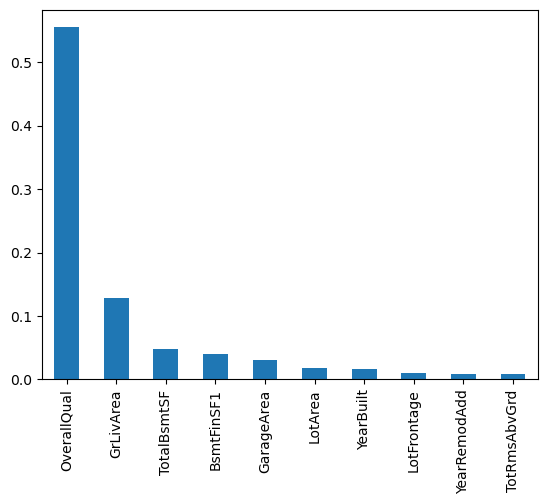

In [93]:
#get the top 10 feature importance
importances=rf1.best_estimator_.feature_importances_
forest_importances=pd.Series(importances,index=X.columns)
top_features = forest_importances.nlargest(10)
fig,ax=plt.subplots()
top_features.plot.bar(ax=ax)

From the model we can conclude that Overalquality,GrliArea and the 8 other features in the bar plot plays a key role in determining the price of a home

In [94]:
#now lets store our predictions
predictions=pd.Series(y_pred)

In [117]:
predictions

0      138475.626224
1      334917.523329
2      115263.806661
3      153267.354257
4      315234.831845
           ...      
433    136732.724167
434    122105.645357
435    193510.228356
436    131598.182087
437    431625.298308
Length: 438, dtype: float64

In [99]:

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,CentralAir_Y
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,No,706,0,150,856,GasA,Ex,SBrkr,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,None,2003.0,548,TA,Y,0,61,0,0,0,0,None,2,2008,WD,Normal,138475.626224,0,0,0,0,1
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,978,0,284,1262,GasA,Ex,SBrkr,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,1976.0,460,TA,Y,298,0,0,0,0,0,None,5,2007,WD,Normal,334917.523329,0,0,0,0,1
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Mn,486,0,434,920,GasA,Ex,SBrkr,0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,2001.0,608,TA,Y,0,42,0,0,0,0,None,9,2008,WD,Normal,115263.806661,0,0,0,0,1
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,No,216,0,540,756,GasA,Gd,SBrkr,0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,1998.0,642,TA,Y,0,35,272,0,0,0,None,2,2006,WD,Abnorml,153267.354257,0,0,0,0,1
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Av,655,0,490,1145,GasA,Ex,SBrkr,0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,2000.0,836,TA,Y,192,84,0,0,0,0,None,12,2008,WD,Normal,315234.831845,0,0,0,0,1


In [97]:
#replace the SalePrice in the train data with the predictions from the model
train_data['SalePrice']=predictions

In [135]:
#select the Id and the SalePrice columns which contains  the predicted values
final=test_data[['Id']]
final['SalePrice']=predictions
final.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10452\702682259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['SalePrice']=predictions


,Id,SalePrice
0,1461,138475.626224
1,1462,334917.523329
2,1463,115263.806661
3,1464,153267.354257
4,1465,315234.831845


In [138]:
final.fillna(final['SalePrice'].mean(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10452\2842511231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.fillna(final['SalePrice'].mean(),inplace=True)


In [139]:
#Now lets save  the file
if not final.empty:
    # Save selected columns to a CSV file without index
    final.to_csv('C:/Users/User/Desktop/Data Analytics projects dataset/submissions.csv',index=False)
    print("Data saved successfully.")
else:
    print("No data to save.")


Data saved successfully.


In [140]:
final.isna().sum()

Id           0
SalePrice    0
dtype: int64

In [141]:
final.shape

(1459, 2)